### **Name: Rishi Bhingare**
### **Project Name: Spam Email Detection**

## **Aim of the project:**

**- We are building a spam email detector.**

**- Here, I have used nltk, TF-IDF vectorizer, Naive Bayes (Multinomial), and**
**LogisticRegression.**


## Data Loading and Exploration

**we will load some basic modules now**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**so we will now load the dataset here.**

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


**the dataset has label column (ham/spam) and text column, which is what we need.**

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5171 non-null   int64
 1   label       5171 non-null   str  
 2   text        5171 non-null   str  
 3   label_num   5171 non-null   int64
dtypes: int64(2), str(2)
memory usage: 161.7 KB


In [5]:
df.drop(['Unnamed: 0', 'label_num'], axis = 1, inplace = True)
print("dropped!")
#**this clears the redundant columns, giving us just the columns we need.**

dropped!


In [6]:
df.head(10)
#to test

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [7]:
df['label'].value_counts()
#this gives us information about how many hams and spams are there in the label column

label
ham     3672
spam    1499
Name: count, dtype: int64

**Here, we will convert ham/spam to 0/1 respectively.**

In [8]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [9]:
df['label'].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

##### ***the following code is to visualize the distribution of data.***

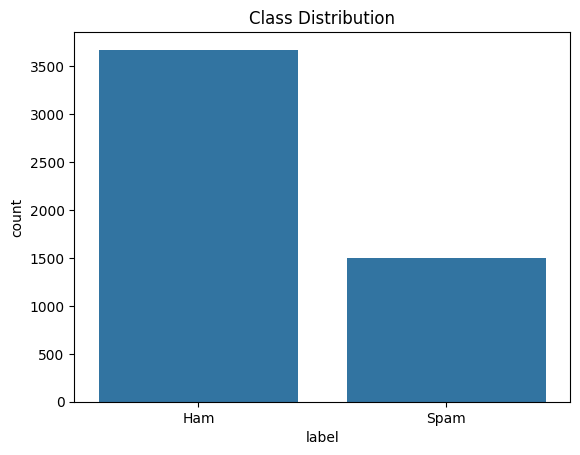

In [10]:
sns.countplot(x='label', data=df)
plt.xticks([0,1], ['Ham','Spam'])
plt.title("Class Distribution")
plt.show()


## Text Preprocessing using NLTK

**we will use nltk for preprocessing.**

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

**Now, we will import nltk related modules.**

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
swords = stopwords.words('english')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [22]:
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [word.lower() for word in tokens if word.isalpha()]
  clean = [stemmer.stem(word) for word in clean if word not in swords]
  return clean



#this step cleans the dataset, removing non-alphabet words & symbols.
#it removes punctuations, symbols and numeric values.
#it also tokenizes the words, removes stopwords and proceeds with stemming procedure.

## TF-IDF Vectorization


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
x = df['text']
y = df['label']
#tfidf.get_feature_names_out()



#tfidf converts text into numeric values as it assigns weights based on
#word importance across dataset.

In [24]:
from sklearn.model_selection import train_test_split
x_train_text, x_test_text, y_train, y_test = train_test_split(x,
    y, test_size=0.25, random_state=42)

x_train = tfidf.fit_transform(x_train_text)
x_test = tfidf.transform(x_test_text)

print("done!")


#here, we are splitting the dataset with 75/25 ratio.

done!


#### **This concludes Data Preprocessing.**

**---------------------------------------------------------------------------------------------------------------------------------**

# Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
y_test.value_counts()

#here, we are using Naive Bayes (MultinomialNB) model for training.

label
0    930
1    363
Name: count, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.9273008507347255


**this shows us the accuracy of MultinomialNB model**

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       930
           1       1.00      0.74      0.85       363

    accuracy                           0.93      1293
   macro avg       0.95      0.87      0.90      1293
weighted avg       0.93      0.93      0.92      1293



'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95       930\n           1       1.00      0.74      0.85       363\n\n    accuracy                           0.93      1293\n   macro avg       0.95      0.87      0.90      1293\nweighted avg       0.93      0.93      0.92      1293\n'

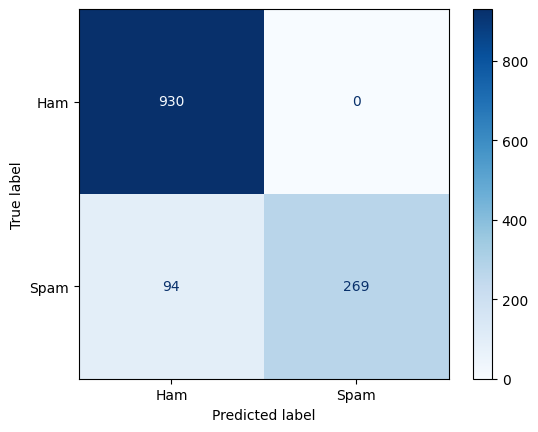

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,display_labels=["Ham", "Spam"],
    cmap="Blues"
)

accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

**------THAT CONCLUDES NAIVE BAYES.------**

**---------------------------------------------------------------------------------------------------------------------------------**

# LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9837587006960556


'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       930\n           1       0.96      0.99      0.97       363\n\n    accuracy                           0.98      1293\n   macro avg       0.98      0.98      0.98      1293\nweighted avg       0.98      0.98      0.98      1293\n'

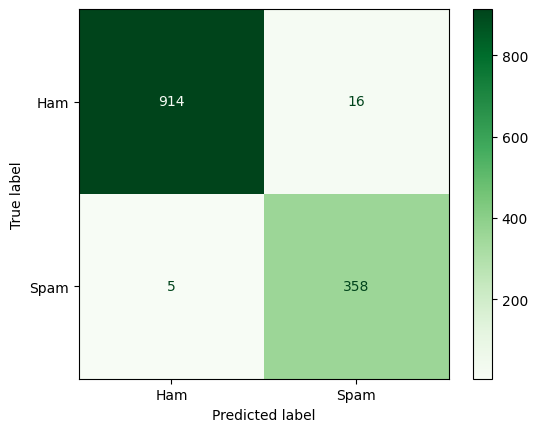

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=["Ham", "Spam"],
    cmap="Greens"
)

accuracy_score(y_test, y_pred_lr)
classification_report(y_test, y_pred_lr)

**------THAT CONCLUDES LOGISTIC REGRESSION.------**

## TESTING

**Now, let us test our respective models with some arbitrary examples.**

here, i have collected some arbitrary sentences, roughly resembling what you will see in spam/ham emails.

In [31]:
sample_messages = [
    "Congratulations! You have won a free lottery ticket. Call now!",
    "Hey, are we meeting for lunch tomorrow?",
    "URGENT! Your mobile number has won a £2,000 prize bonus. Call 09061701461 to claim now! Valid for 24 hours only.",
    "CONGRATULATIONS! You’ve been selected for a free $1000 Walmart gift card. Click the link below to claim your reward: bit.ly",
    "Hey man, are we still meeting at the gym at 6? Let me know if you're running late.",
    "The meeting has been rescheduled to Tuesday at 10:00 AM in the main conference room. See you there.",
    "I'm just heading to the grocery store, do you need anything besides milk and eggs?"  
]

sample_tfidf = tfidf.transform(sample_messages)

print("Naive Bayes Predictions:", nb.predict(sample_tfidf))
print("Logistic Regression Predictions:", lr.predict(sample_tfidf))


Naive Bayes Predictions: [0 0 0 1 0 0 0]
Logistic Regression Predictions: [1 0 1 1 0 0 0]


In [32]:
for msg in sample_messages:
    transformed = tfidf.transform([msg])
    print("\nMessage:", msg)
    print("NB:", "Spam" if nb.predict(transformed)[0] == 1 else "Ham")
    print("LR:", "Spam" if lr.predict(transformed)[0] == 1 else "Ham")



Message: Congratulations! You have won a free lottery ticket. Call now!
NB: Ham
LR: Spam

Message: Hey, are we meeting for lunch tomorrow?
NB: Ham
LR: Ham

Message: URGENT! Your mobile number has won a £2,000 prize bonus. Call 09061701461 to claim now! Valid for 24 hours only.
NB: Ham
LR: Spam

Message: CONGRATULATIONS! You’ve been selected for a free $1000 Walmart gift card. Click the link below to claim your reward: bit.ly
NB: Spam
LR: Spam

Message: Hey man, are we still meeting at the gym at 6? Let me know if you're running late.
NB: Ham
LR: Ham

Message: The meeting has been rescheduled to Tuesday at 10:00 AM in the main conference room. See you there.
NB: Ham
LR: Ham

Message: I'm just heading to the grocery store, do you need anything besides milk and eggs?
NB: Ham
LR: Ham
